# Fugas y Ventaneo (Leakage and windowing)


In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import decorate
from thinkdsp import SinSignal

#### La Transformada Discreta de Fourier (DFT), que usamos para calcular espectros, trata las ondas como si fueran periódicas; es decir, asume que el segmento finito opera es un período completo de una señal infinita que se repite todo el tiempo. En la práctica, esta suposición es a menudo falsa, lo que crea problemas.

#### Un problema común es la discontinuidad al principio y al final del segmento. Debido a que DFT supone que la señal es periódica, conecta implícitamente el final del segmento de regreso al principio para hacer un bucle. Si el final no se conecta suavemente al principio, la discontinuidad crea componentes de frecuencia en el segmento que no están en la señal.


#### La fuga espectral ocurre cuando parte de la energía en una frecuencia aparece en otra frecuencia (generalmente cerca)

In [2]:
signal = SinSignal(freq=440)

Si la duración es un múltiplo entero del período, el principio y el final del segmento se alinean y obtenemos una fuga mínima.

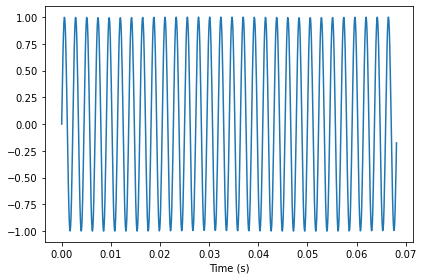

In [3]:
duration = signal.period * 30
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

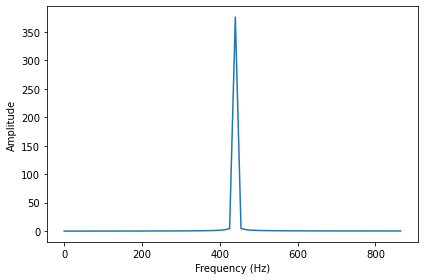

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [5]:
wave.make_audio()

Si la duración no es múltiplo de un período, la fuga es bastante mala.

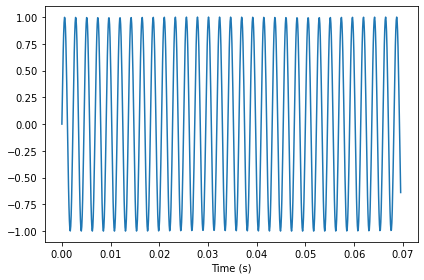

In [6]:
duration = signal.period * 30.65
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

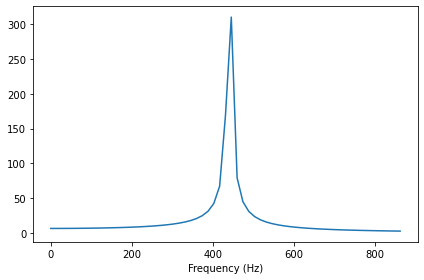

In [7]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

In [8]:
wave.make_audio()

Podemos reducir las fugas suavizando la discontinuidad entre el comienzo
finalización y final del segmento, y una forma de hacerlo es mediante ventanas.

Una "ventana" es una función diseñada para transformar un segmento no periódico en
algo que puede pasar por periódico

## Lo siguiente muestra el efecto de 4 diferentes ventanas

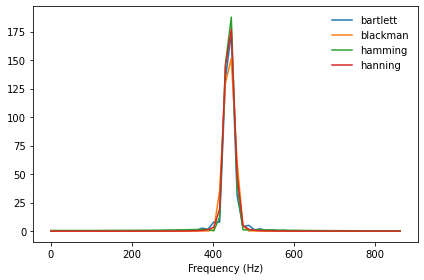

In [9]:
for window_func in [np.bartlett, np.blackman, np.hamming, np.hanning]:
    wave = signal.make_wave(duration)
    wave.ys *= window_func(len(wave.ys))

    spectrum = wave.make_spectrum()
    spectrum.plot(high=880, label=window_func.__name__)

decorate(xlabel='Frequency (Hz)')

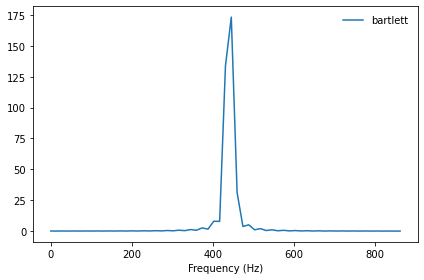

In [10]:
wave = signal.make_wave(duration)
wave.ys *= np.bartlett(len(wave.ys))
spectrum = wave.make_spectrum()
spectrum.plot(high=880, label=np.bartlett.__name__)

decorate(xlabel='Frequency (Hz)')

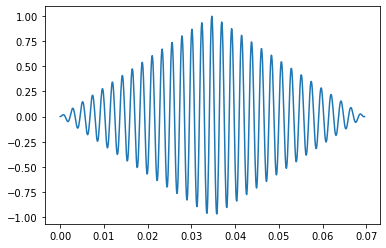

In [11]:
spectrum.make_wave()
wave.plot()

In [12]:
wave.make_audio()

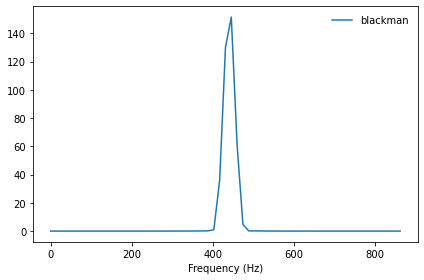

In [13]:
wave = signal.make_wave(duration)
wave.ys *= np.blackman(len(wave.ys))
spectrum = wave.make_spectrum()
spectrum.plot(high=880, label=np.blackman.__name__)

decorate(xlabel='Frequency (Hz)')

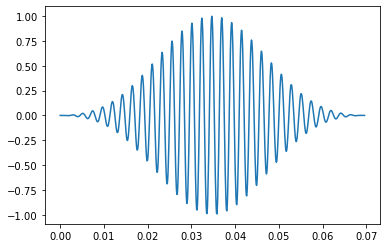

In [14]:
spectrum.make_wave()
wave.plot()

In [15]:
wave.make_audio()

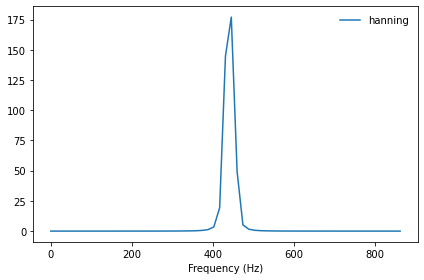

In [16]:
wave = signal.make_wave(duration)
wave.ys *= np.hanning(len(wave.ys))
spectrum = wave.make_spectrum()
spectrum.plot(high=880, label=np.hanning.__name__)

decorate(xlabel='Frequency (Hz)')

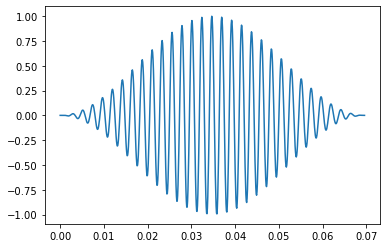

In [17]:
spectrum.make_wave()
wave.plot()

In [18]:
wave.make_audio()

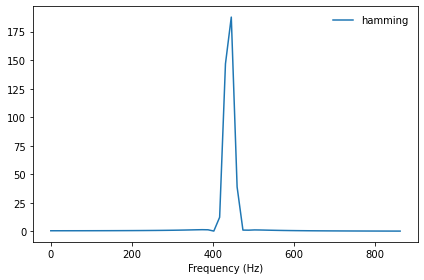

In [19]:
wave = signal.make_wave(duration)
wave.ys *= np.hamming(len(wave.ys))
spectrum = wave.make_spectrum()
spectrum.plot(high=880, label=np.hamming.__name__)

decorate(xlabel='Frequency (Hz)')

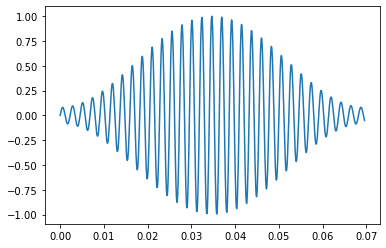

In [20]:
spectrum.make_wave()
wave.plot()

In [21]:
wave.make_audio()